In [5]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as pit
import seaborn as sns
import pandas as pd



In [6]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.fillna(0, inplace=True)

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,27.756732,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,9.529497,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,0.000000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,22.900000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,27.700000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df["id"].duplicated().sum()

0

In [12]:
def conv(value):
    if value == 1:
        return "yes"
    else :
        return "no"
    
df['hypertension'] = df['hypertension'].apply(conv)
df['heart_disease'] = df['heart_disease'].apply(conv)   

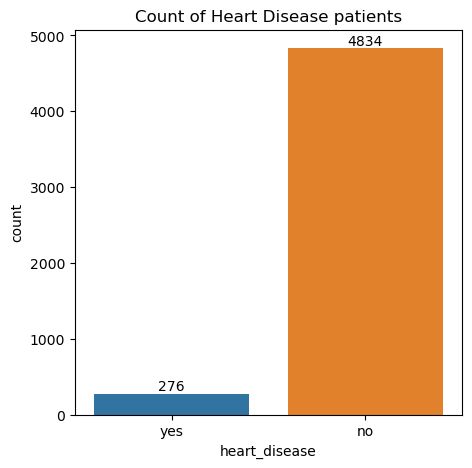

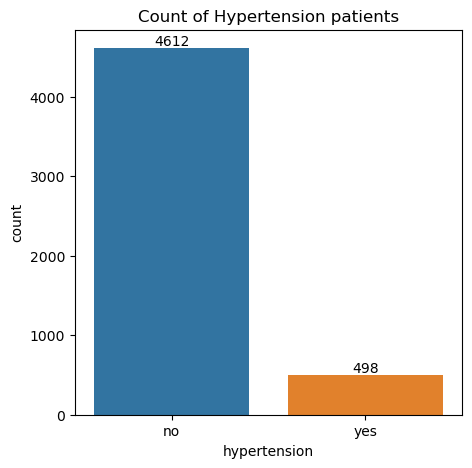

In [13]:
pit.figure(figsize=(5,5))
ax = sns.countplot(x = df['heart_disease'])

ax.bar_label(ax.containers[0])
pit.title("Count of Heart Disease patients")
pit.show()

pit.figure(figsize=(5,5))
bx = sns.countplot(x = df['hypertension'])

bx.bar_label(bx.containers[0])
pit.title("Count of Hypertension patients")
pit.show()


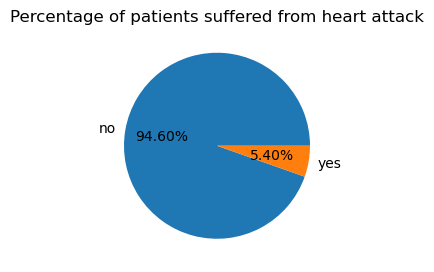

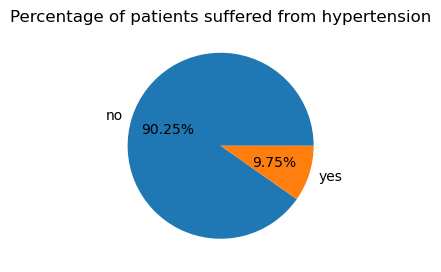

In [14]:
pit.figure(figsize=(3,4))
gb = df.groupby("heart_disease").agg({'heart_disease':"count"})

pit.pie(gb['heart_disease'], labels=gb.index, autopct="%1.2f%%")
pit.title("Percentage of patients suffered from heart attack")
pit.show()

pit.figure(figsize=(3,4))
hb = df.groupby("hypertension").agg({'hypertension':"count"})

pit.pie(hb['hypertension'], labels=hb.index, autopct="%1.2f%%")
pit.title("Percentage of patients suffered from hypertension")
pit.show()

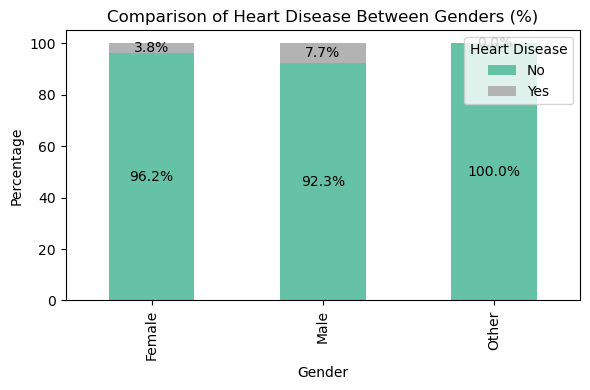

In [15]:


crosstab = pd.crosstab(df['gender'], df['heart_disease'])

crosstab_percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

crosstab_percent.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set2')

for i, (index, row) in enumerate(crosstab_percent.iterrows()):
    bottom = 0
    for j, value in enumerate(row):
        pit.text(i, bottom + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=10)
        bottom += value

pit.title('Comparison of Heart Disease Between Genders (%)')
pit.ylabel('Percentage')
pit.xlabel('Gender')
pit.legend(title='Heart Disease', labels=['No', 'Yes']) 
pit.tight_layout()
pit.show()


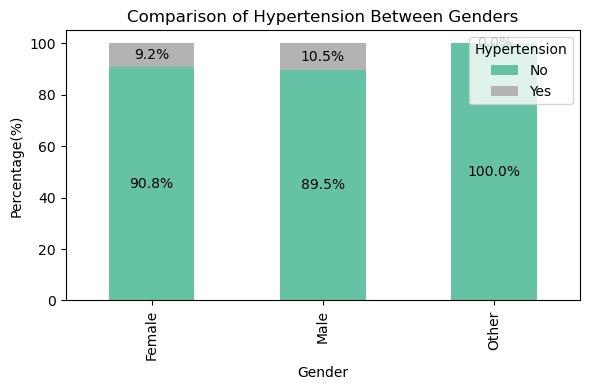

In [16]:
crosstab = pd.crosstab(df['gender'], df['hypertension'])

crosstab_percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

crosstab_percent.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set2')

for i, (index, row) in enumerate(crosstab_percent.iterrows()):
    bottom = 0
    for j, value in enumerate(row):
        pit.text(i, bottom + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=10)
        bottom += value

pit.title('Comparison of Hypertension Between Genders')
pit.ylabel('Percentage(%)')
pit.xlabel('Gender')
pit.legend(title='Hypertension', labels=['No', 'Yes'])  
pit.tight_layout()
pit.show()


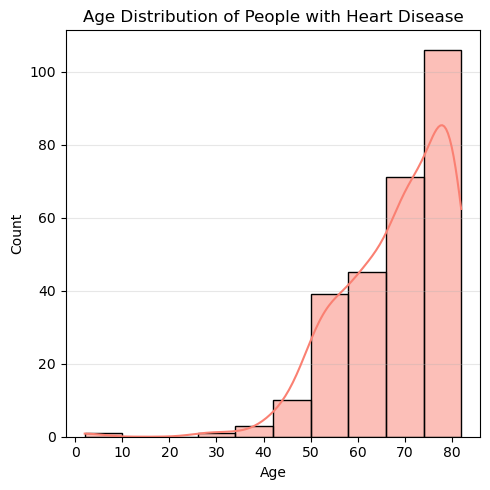

In [17]:
df_heart = df[df['heart_disease'] == 'yes']
pit.figure(figsize=(5, 5))
sns.histplot(df_heart['age'], bins=10, kde=True, color='salmon')  


pit.title('Age Distribution of People with Heart Disease')
pit.xlabel('Age')
pit.ylabel('Count')
pit.grid(axis='y', alpha=0.3)
pit.tight_layout()
pit.show()

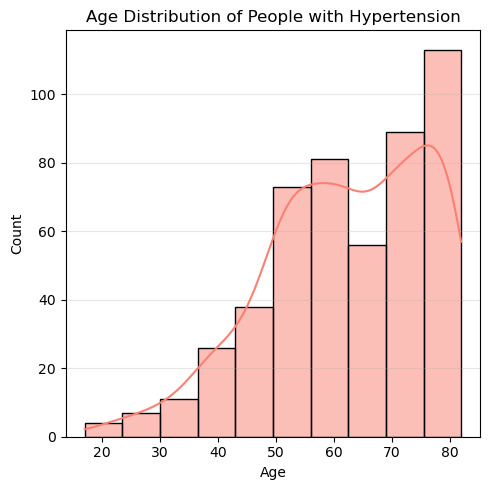

In [18]:
df_ht = df[df['hypertension'] == 'yes']
pit.figure(figsize=(5, 5))
sns.histplot(df_ht['age'], bins=10, kde=True, color='salmon')  


pit.title('Age Distribution of People with Hypertension')
pit.xlabel('Age')
pit.ylabel('Count')
pit.grid(axis='y', alpha=0.3)
pit.tight_layout()
pit.show()


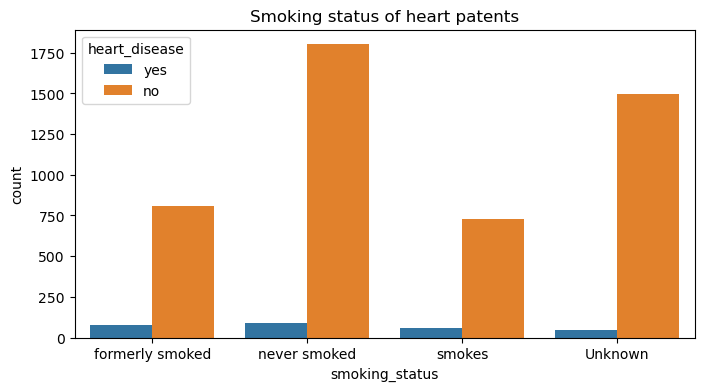

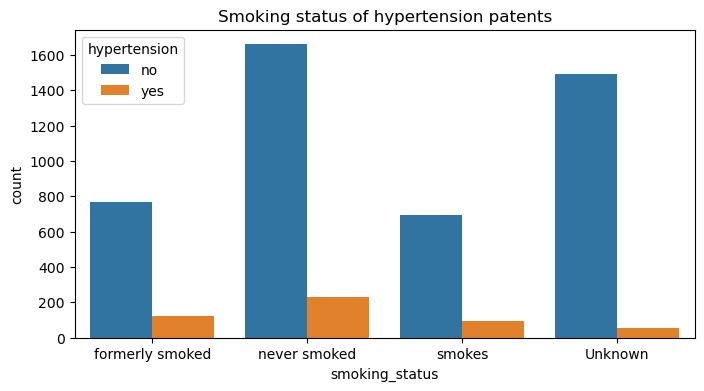

In [19]:
df_ht = df[df['hypertension'] == 'yes']

pit.figure(figsize=(8,4))
pit.colormap='Set2'
sns.countplot(x = 'smoking_status', data = df, hue="heart_disease")
pit.title("Smoking status of heart patents")
pit.show()

pit.figure(figsize=(8,4))
pit.colormap = 'Set2'
sns.countplot(x = 'smoking_status', data = df, hue="hypertension")
pit.title("Smoking status of hypertension patents")
pit.show()

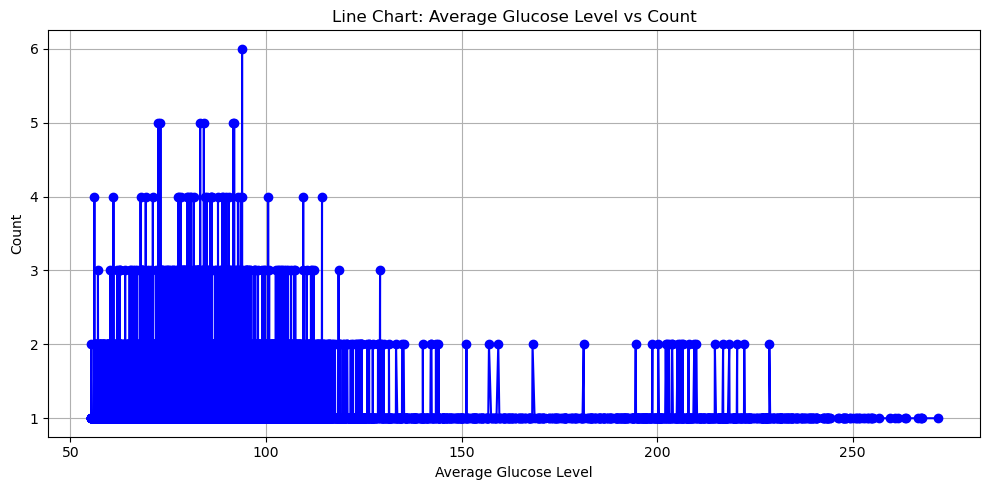

In [20]:
count_data = df['avg_glucose_level'].value_counts().sort_index()  # use sort_index() to keep age in order

pit.figure(figsize=(10, 5))
pit.plot(count_data.index, count_data.values, marker='o', linestyle='-', color='blue')

pit.title('Line Chart: Average Glucose Level vs Count')
pit.xlabel('Average Glucose Level')
pit.ylabel('Count')
pit.grid(True)
pit.tight_layout()
pit.show()

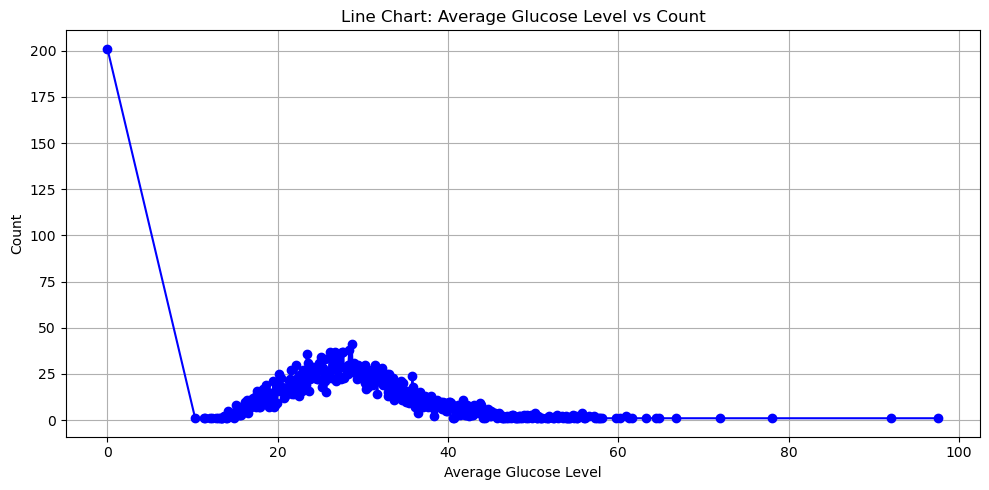

In [21]:
count_data = df['bmi'].value_counts().sort_index()  # use sort_index() to keep age in order

pit.figure(figsize=(10, 5))
pit.plot(count_data.index, count_data.values, marker='o', linestyle='-', color='blue')

pit.title('Line Chart: Average Glucose Level vs Count')
pit.xlabel('Average Glucose Level')
pit.ylabel('Count')
pit.grid(True)
pit.tight_layout()
pit.show()

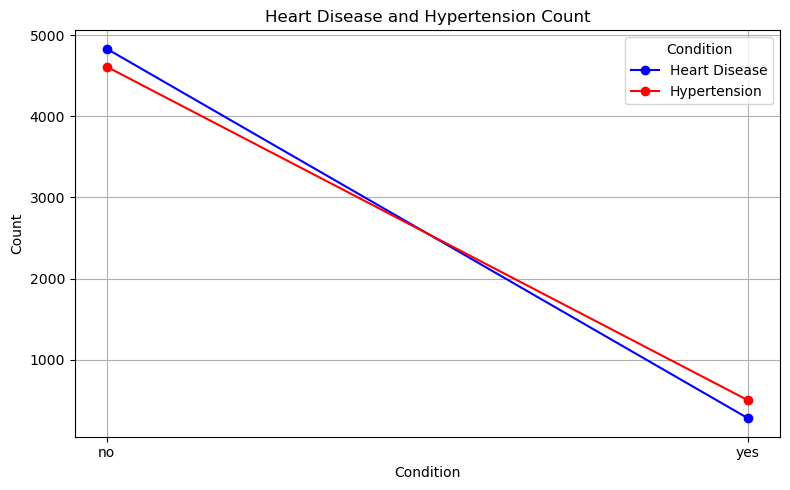

In [22]:
heart_disease_count = df['heart_disease'].value_counts().sort_index()
hypertension_count = df['hypertension'].value_counts().sort_index()

count_df = pd.DataFrame({
    'Heart Disease': heart_disease_count,
    'Hypertension': hypertension_count
})

pit.figure(figsize=(8, 5))
pit.plot(count_df.index, count_df['Heart Disease'], marker='o', label='Heart Disease', color='blue')
pit.plot(count_df.index, count_df['Hypertension'], marker='o', label='Hypertension', color='red')


pit.title('Heart Disease and Hypertension Count')
pit.xlabel('Condition')
pit.ylabel('Count')
pit.legend(title='Condition')
pit.grid(True)
pit.tight_layout()

pit.show()